In [2]:
# utilities ok
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report




In [3]:
# Importing the dataset
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
# !gdown 1oyDLRXPTN3vtaStHGY8q_yCcBc5-i68j
dataset = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/eksploracja danych/Twitter_Sentiment_Analysis/data/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)
dataset.head(20)

# mozna pomyslec i zrobic wizualizacje od słow zaczynających sie na @ i sprawidzć co jest najpoualrniejsze i jeszcze można po #


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
dataset.head(20)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
dataset.tail(20)

,target,ids,date,flag,user,text
1599980,4,2193578679,Tue Jun 16 08:38:56 PDT 2009,NO_QUERY,puchal_ek,@myheartandmind jo jen by nemuselo zrovna tÃ© ...
1599981,4,2193578716,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...
1599982,4,2193578739,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...
1599983,4,2193578758,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,xoAurixo,"@oxhot theri tomorrow, drinking coffee, talkin..."
1599984,4,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,You heard it here first -- We're having a girl...
1599985,4,2193578982,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,LISKFEST,"if ur the lead singer in a band, beware fallin..."
1599986,4,2193579087,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,marhgil,@tarayqueen too much ads on my blog.
1599987,4,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get...
1599988,4,2193579191,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,tellman,@Roy_Everitt ha- good job. that's right - we g...
1599989,4,2193579211,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,jazzstixx,@Ms_Hip_Hop im glad ur doing well


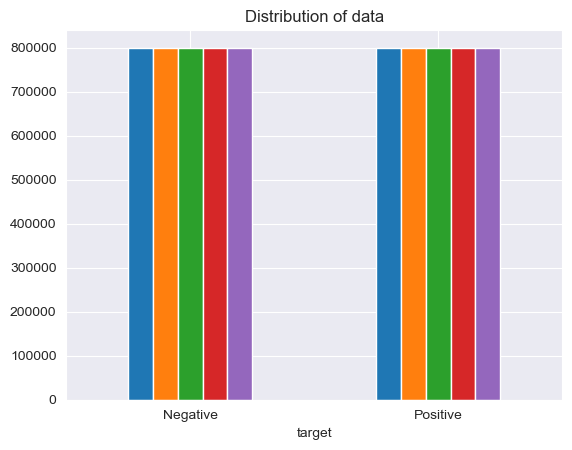

In [6]:
# Replacing the values to ease understanding.
dataset['target'] = dataset['target'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['target'])

In [7]:
months_data = {
  "May": 0,
  "Apr": 0,
  "Jun": 0
}
for i in dataset['date']:

  if i.split(" ")[1] == 'Apr':
    months_data['Apr'] += 1
  elif i.split(" ")[1] == 'May':
    months_data['May'] += 1
  elif i.split(" ")[1] == 'Jun':
    months_data['Jun'] += 1

In [8]:
print(months_data['Apr'])
print(months_data['May'])
print(months_data['Jun'])

100025
576367
923608


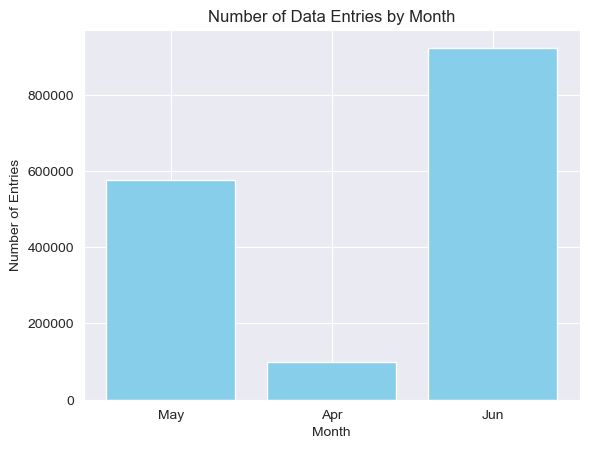

In [9]:

months = list(months_data.keys())
counts = list(months_data.values())

# Creating the bar graph
plt.bar(months, counts, color='skyblue')

# Adding titles and labels
plt.title('Number of Data Entries by Month')
plt.xlabel('Month')
plt.ylabel('Number of Entries')

# Display the graph
plt.show()

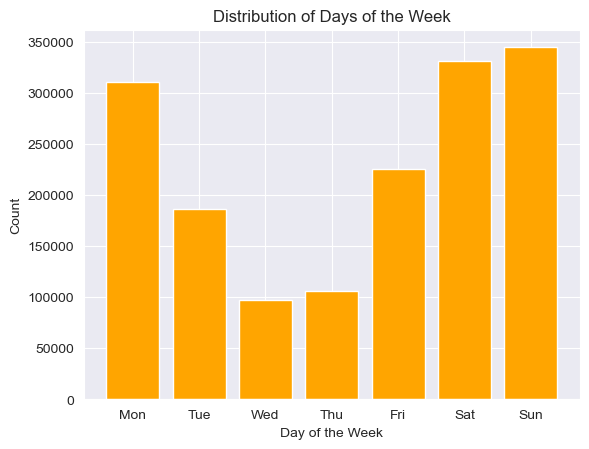

In [10]:
days_data = {
  "Mon": 0,
  "Tue": 0,
  "Wed": 0,
  "Thu": 0,
  "Fri": 0,
  "Sat": 0,
  "Sun": 0,
}
for i in dataset['date']:
    day_of_week = i.split(" ")[0]
    if day_of_week == 'Mon':
        days_data['Mon'] += 1
    elif day_of_week == 'Tue':
        days_data['Tue'] += 1
    elif day_of_week == 'Wed':
        days_data['Wed'] += 1
    elif day_of_week == 'Thu':
        days_data['Thu'] += 1
    elif day_of_week == 'Fri':
        days_data['Fri'] += 1
    elif day_of_week == 'Sat':
        days_data['Sat'] += 1
    elif day_of_week == 'Sun':
        days_data['Sun'] += 1

# Plotting the distribution of days of the week
plt.bar(days_data.keys(), days_data.values(), color='orange')
plt.title('Distribution of Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()
